<a href="https://colab.research.google.com/github/ssaket/visual-perception/blob/main/models/CIFAR_AuBN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Dropout, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
cifar = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
#print shape
print("Training data shape", x_train.shape)
print("Labels shape", y_train.shape)

Training data shape (50000, 32, 32, 3)
Labels shape (50000,)


In [4]:
#number of classes 
K = len(set(y_train))

In [7]:
#build model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, 3, strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, 3, strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, 3, strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, 3, strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, 3, strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(128, 3, strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(inputs=i, outputs=x)

In [9]:
#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 44s 9ms/step - loss: 1.3943 - accuracy: 0.5140 - val_loss: 1.6948 - val_accuracy: 0.4922
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0898 - accuracy: 0.6210 - val_loss: 1.2087 - val_accuracy: 0.5861
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9332 - accuracy: 0.6763 - val_loss: 1.0985 - val_accuracy: 0.6304
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7837 - accuracy: 0.7299 - val_loss: 1.1848 - val_accuracy: 0.6060
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6588 - accuracy: 0.7713 - val_loss: 1.2908 - val_accuracy: 0.6030
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5651 - accuracy: 0.8063 - val_loss: 1.1075 - val_accuracy: 0.6499
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4629 - accuracy: 0.8409 - val_loss: 1.2008 - val_ac

In [11]:
batch_size=32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=.2, height_shift_range=.2, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epochs = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epochs, epochs=25)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
1562/1562 [==============================] - 41s 26ms/step - loss: 1.6359 - accuracy: 0.4426 - val_loss: 1.2403 - val_accuracy: 0.5975
Epoch 2/25
1562/1562 [==============================] - 41s 26ms/step - loss: 1.3732 - accuracy: 0.5220 - val_loss: 1.1357 - val_accuracy: 0.6109
Epoch 3/25
1562/1562 [==============================] - 41s 26ms/step - loss: 1.2884 - accuracy: 0.5493 - val_loss: 1.0243 - val_accuracy: 0.6400
Epoch 4/25
1562/1562 [==============================] - 40s 26ms/step - loss: 1.2384 - accuracy: 0.5673 - val_loss: 1.0250 - val_accuracy: 0.6475
Epoch 5/25
1562/1562 [==============================] - 40s 26ms/step - loss: 1.1970 - accuracy: 0.5843 - val_loss: 1.1042 - val_accuracy: 0.6147
Epoch 6/25
1562/1562 [==============================] - 40s 26ms/step - loss: 1.1760 - accuracy: 0.5912 - val_loss: 0.9248 - val_accuracy: 0.6809
Epoch 7/25
1562/1562 [==============================] - 40s 25ms/step - loss: 1.1516 - accuracy: 0.5992 - val_loss: 0.9460 -

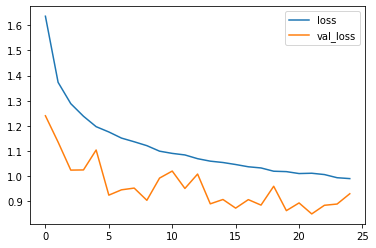

In [12]:
import seaborn as sns
sns.lineplot(x=range(len(r.history['loss'])), y=r.history['loss'], label='loss')
sns.lineplot(x=range(len(r.history['val_loss'])), y=r.history['val_loss'], label='val_loss')

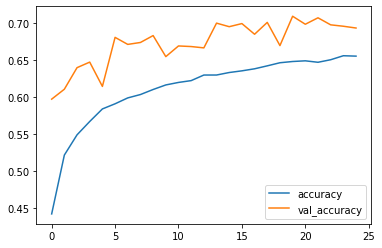

In [13]:
sns.lineplot(x=range(len(r.history['accuracy'])), y=r.history['accuracy'], label='accuracy')
sns.lineplot(x=range(len(r.history['val_accuracy'])), y=r.history['val_accuracy'], label='val_accuracy')

In [14]:
y_pred = model.predict(x_test).argmax(axis=1)

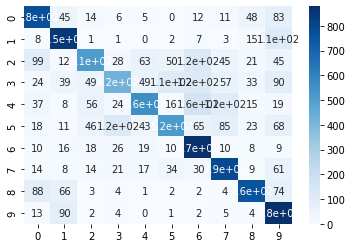

In [15]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, cmap='Blues', annot=True)

In [22]:
#missclassified_classes
missclassified_idx = np.where(y_test != y_pred)[0]

In [19]:
#CIFAR-10 labels
labels = '''
airplane 										
automobile 										
bird 										
cat 										
deer 										
dog 										
frog 										
horse 										
ship 										
truck
'''.split()

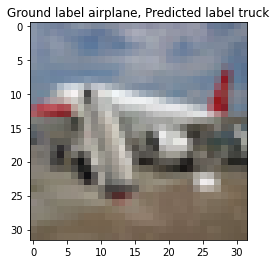

In [31]:
import matplotlib.pyplot as plt
idx = np.random.choice(missclassified_idx)
plt.imshow(x_test[idx], cmap='gray')
plt.title('Ground label %s, Predicted label %s'%(labels[y_test[idx]], labels[y_pred[idx]]));